In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(20.0,10.0)

### Reading Data

In [3]:
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
# splitting X and Y
x = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values

In [5]:
# Calculating mean of x and y
mean_x = np.mean(x)
mean_y = np.mean(y)

# Total number of values
m = len(x)

#using the formula to calculate b1 and b0
numer=0
denom=0
for i in range(m):
    numer += (x[i]-mean_x) * (y[i]-mean_y)
    denom += (x[i]-mean_x) ** 2
b1 = numer/denom
b0 = mean_y - (b1 * mean_x)

#print coefficients
print(b1,b0)

0.26342933948939945 325.57342104944223


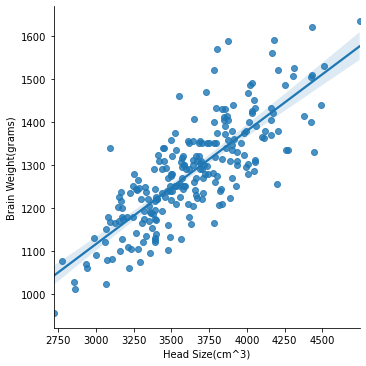

In [8]:
sns.lmplot(x='Head Size(cm^3)',y='Brain Weight(grams)',data=data)

In [9]:
# Calculating R-square
ss_t = 0
ss_r = 0
for i in range(m):
    y_p = b1 * x[i] + b0
    ss_t += (y[i] - mean_y) ** 2
    ss_r += (y[i] - y_p) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use Rank 1 matrix in scikit learn
x = x.reshape((m,1))
# Creating Model
reg = LinearRegression()
#Fitting training data
reg = reg.fit(x,y)
# y prediction
y_pred = reg.predict(x)

# Calculating r2 Score
r2_score = reg.score(x,y)
print(r2_score)

0.639311719957
